<a href="https://colab.research.google.com/github/akshithareddy0455-source/autism-screening-classification-using-decision-trees/blob/main/Autism_Screening_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving autism+screening+adult.zip to autism+screening+adult (1).zip


In [ ]:
!pip install liac-arff


  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=682262cebf59340e8ef55118bf7ed07a5bde58af84f13a7b7c64856f1f9090f2
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving autism+screening+adult.zip to autism+screening+adult.zip


In [ ]:
!pip install liac-arff


  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=b8f19f51d087701fabda5442ac779852c0f9fd1c4a25ca15fd21971523aafee5
  Stored in directory: /root/.cache/pip/wheels/a9/ac/cf/c2919807a5c623926d217c0a18eb5b457e5c19d242c3b5963a
Successfully built liac-arff


In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
autism_screening_adult = fetch_ucirepo(id=426)

# data (as pandas dataframes)
X = autism_screening_adult.data.features
y = autism_screening_adult.data.targets

# metadata
print(autism_screening_adult.metadata)

# variable information
print(autism_screening_adult.variables)


{'uci_id': 426, 'name': 'Autism Screening Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/426/autism+screening+adult', 'data_url': 'https://archive.ics.uci.edu/static/public/426/data.csv', 'abstract': 'Autistic Spectrum Disorder Screening Data for Adult. This dataset is related to classification and predictive tasks.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': [], 'num_instances': 704, 'num_features': 20, 'feature_types': ['Integer'], 'demographics': ['Age', 'Gender', 'Ethnicity', 'Nationality'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2017, 'last_updated': 'Thu Mar 28 2024', 'dataset_doi': '10.24432/C5F019', 'creators': ['Fadi Thabtah'], 'intro_paper': None, 'additional_info': {'summary': "See attached variables' description file ", 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_splits': None, 'sensitive_data': 

In [ ]:
# Step 1: Download dataset from UCI repository
!wget -q -O autism_data.csv "https://archive.ics.uci.edu/static/public/426/data.csv"

# Step 2: Check file size
!wc -c autism_data.csv

# Step 3: Load and preview data
import pandas as pd
df = pd.read_csv("autism_data.csv")
print("✅ Dataset loaded successfully!")
print("Rows, Columns:", df.shape)
df.head()


58264 autism_data.csv
✅ Dataset loaded successfully!
Rows, Columns: (704, 21)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,family_pdd,country_of_res,used_app_before,result,age_desc,relation,class
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


Initial shape: (704, 21)
Columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jaundice', 'family_pdd', 'country_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'class']

Sample rows:


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,family_pdd,country_of_res,used_app_before,result,age_desc,relation,class
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO



Numeric conversion check (sample):
A1_Score       int64
A2_Score       int64
A3_Score       int64
A4_Score       int64
A5_Score       int64
A6_Score       int64
A7_Score       int64
A8_Score       int64
A9_Score       int64
A10_Score      int64
age          float64
result         int64
dtype: object

Target unique values before mapping: ['NO' 'YES']
Target counts after mapping:
 class
0    515
1    189
Name: count, dtype: int64
Filled missing age with median: 27

Final feature shape: (704, 20)
Numeric features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']
Categorical features (sample): ['gender', 'ethnicity', 'jaundice', 'family_pdd', 'country_of_res', 'used_app_before', 'age_desc', 'relation']

Train/test sizes: (577, 20) (127, 20)

Baseline results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00 

/tmp/ipython-input-2031389337.py:33: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'YES':1, 'Y':1, '1':1, 'NO':0, 'N':0, '0':0})



Best params: {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_leaf': 1}

Tuned results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        93
           1       1.00      1.00      1.00        34

    accuracy                           1.00       127
   macro avg       1.00      1.00      1.00       127
weighted avg       1.00      1.00      1.00       127

Confusion matrix:
 [[93  0]
 [ 0 34]]
ROC-AUC: 1.0


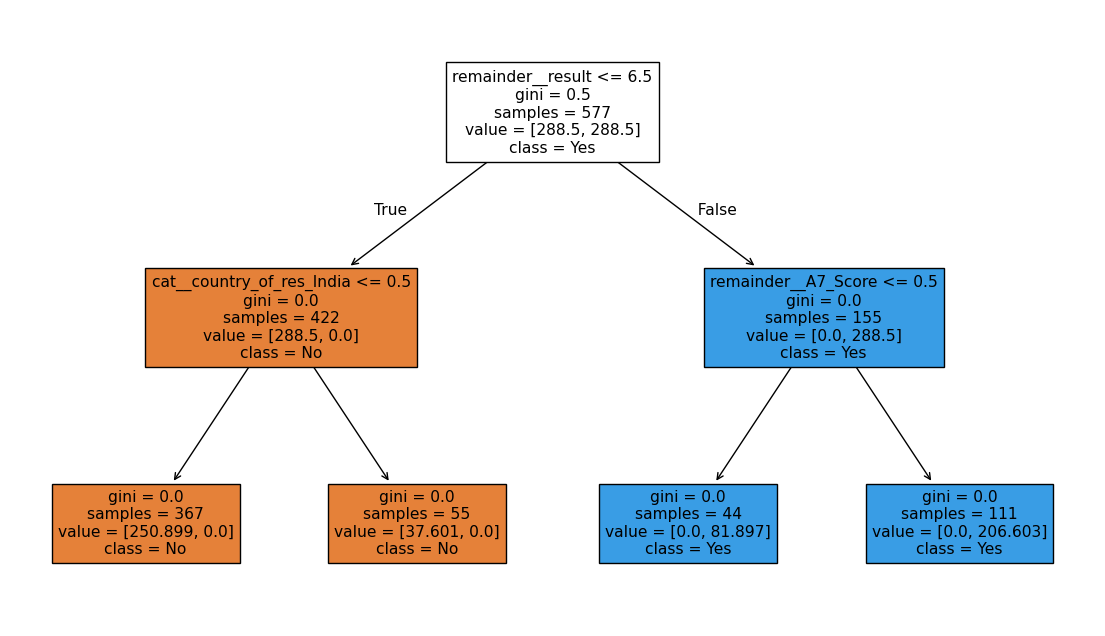

Saved model to autism_dt_model.joblib


In [ ]:
# ---------- CLEAN, TRAIN, EVALUATE (copy-paste into Colab) ----------
import pandas as pd
import numpy as np

# load (if not already loaded)
df = pd.read_csv("autism_data.csv")

# 1) Quick preview
print("Initial shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nSample rows:")
display(df.head())

# 2) Remove surrounding single quotes from string fields (e.g. 'United States' -> United States)
df = df.replace(r"^'(.*)'$", r"\1", regex=True)

# 3) Trim whitespace and normalize strings for object columns
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()

# 4) Convert numeric-like columns to numeric (A1..A10, age, result if needed)
num_cols_guess = [c for c in df.columns if any(prefix in c for prefix in ['A', 'age', 'result']) and c not in ['age_desc']]
for c in num_cols_guess:
    # try to coerce to numeric; keep as-is if fails
    df[c] = pd.to_numeric(df[c], errors='coerce')

print("\nNumeric conversion check (sample):")
print(df[num_cols_guess].dtypes)

# 5) Target mapping: class -> 1/0
print("\nTarget unique values before mapping:", df['class'].unique()[:20])
df['class'] = df['class'].astype(str).str.strip().str.upper()
df['class'] = df['class'].replace({'YES':1, 'Y':1, '1':1, 'NO':0, 'N':0, '0':0})
# fallback if any odd strings remain
df['class'] = df['class'].apply(lambda x: 1 if str(x).upper().startswith('Y') else (0 if str(x).upper().startswith('N') else x))
# ensure integer type
df['class'] = pd.to_numeric(df['class'], errors='coerce').fillna(0).astype(int)
print("Target counts after mapping:\n", df['class'].value_counts())

# 6) Handle missing values
# Age: median
if 'age' in df.columns:
    med_age = int(df['age'].median(skipna=True))
    df['age'] = df['age'].fillna(med_age)
    print("Filled missing age with median:", med_age)

# Fill categorical missings with 'Unknown'
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# remove anything that's clearly not a feature or is the target
categorical_cols = [c for c in categorical_cols if c != 'class']
for c in categorical_cols:
    df[c] = df[c].replace({'nan':'Unknown', 'None':'Unknown', '': 'Unknown'}).fillna('Unknown')

# 7) Decide features (drop columns that don't help or are identifiers)
# Inspect column list and drop columns you don't want; here we keep all except maybe an identifier
# If there's an ID column remove it, else keep
to_drop = []  # add any columns you want to drop, e.g. ['index','id']
X = df.drop(columns=['class'] + to_drop, errors='ignore')
y = df['class']

print("\nFinal feature shape:", X.shape)

# 8) Prepare pipeline: OneHot encode categoricals, pass numeric through
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

# detect numeric & categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = [c for c in X.columns if c not in numeric_features]

print("Numeric features:", numeric_features)
print("Categorical features (sample):", categorical_features[:10])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
    ],
    remainder="passthrough"  # numeric columns passed through
)

pipeline = Pipeline([
    ("pre", preprocessor),
    ("clf", DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# 9) Train/test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, stratify=y, random_state=42)
print("\nTrain/test sizes:", X_train.shape, X_test.shape)

# 10) Baseline fit
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("\nBaseline results:")
print(classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

# 11) Quick optional hyperparameter tuning (small grid)
param_grid = {
    "clf__criterion": ["gini", "entropy"],
    "clf__max_depth": [3,5,8, None],
    "clf__min_samples_leaf": [1,2,5]
}
cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
gs = GridSearchCV(pipeline, param_grid, cv=cv, scoring="f1", n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)
print("\nBest params:", gs.best_params_)

best_model = gs.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nTuned results:")
print(classification_report(y_test, y_pred_best))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_best))

# 12) ROC-AUC (if supports predict_proba)
try:
    probs = best_model.predict_proba(X_test)[:,1]
    print("ROC-AUC:", roc_auc_score(y_test, probs))
except Exception as e:
    print("ROC-AUC not available:", e)

# 13) Visualize small depth of tree (for interpretability)
plt.figure(figsize=(14,8))
# get feature names from preprocessor
try:
    feat_names = best_model.named_steps['pre'].get_feature_names_out()
except:
    # if older sklearn, try alternative
    enc = best_model.named_steps['pre'].named_transformers_['cat']
    try:
        enc_names = enc.get_feature_names_out(categorical_features)
        feat_names = list(enc_names) + numeric_features
    except:
        feat_names = numeric_features + categorical_features

# plot tree (limit depth for clarity)
plot_tree(best_model.named_steps['clf'], feature_names=feat_names, class_names=['No','Yes'], filled=True, max_depth=3)
plt.show()

# 14) Save model (optional)
import joblib
joblib.dump(best_model, "autism_dt_model.joblib")
print("Saved model to autism_dt_model.joblib")

# --------- END ----------


In [ ]:
# 1a) Any duplicate rows?
print("Duplicates:", df.duplicated().sum())

# 1b) Are there features that perfectly separate classes?
for c in df.columns:
    vals = df.groupby(c)['class'].nunique() if df[c].nunique() < 30 else None
    if vals is not None:
        # If some value of c maps only to one class, show it
        for v, count in df.groupby(c)['class'].value_counts().items():
            pass
# simpler quick check: value counts per class per column
for c in ['result','age_desc','relation','country_of_res']:
    if c in df.columns:
        print("\nColumn:", c)
        print(pd.crosstab(df[c], df['class']))


Duplicates: 5

Column: result
class     0   1
result         
0        14   0
1        33   0
2        74   0
3       110   0
4       131   0
5        83   0
6        70   0
7         0  57
8         0  55
9         0  47
10        0  30

Column: age_desc
class          0    1
age_desc             
18 and more  515  189

Column: relation
class                       0    1
relation                          
Health care professional    3    1
Others                      4    1
Parent                     38   12
Relative                   19    9
Self                      365  157
Unknown                    86    9

Column: country_of_res
class                  0   1
country_of_res              
Afghanistan           11   2
AmericanSamoa          1   1
Angola                 1   0
Argentina              1   1
Armenia                2   0
...                   ..  ..
United Arab Emirates  79   3
United Kingdom        48  29
United States         60  53
Uruguay                0   1
Viet Nam

In [ ]:
from sklearn.tree import export_text
# best_model is the GridSearchCV best_estimator_ from your run
dt = best_model.named_steps['clf']
feature_names = best_model.named_steps['pre'].get_feature_names_out()
print(export_text(dt, feature_names=list(feature_names)))


|--- remainder__result <= 6.50
|   |--- cat__country_of_res_India <= 0.50
|   |   |--- class: 0
|   |--- cat__country_of_res_India >  0.50
|   |   |--- class: 0
|--- remainder__result >  6.50
|   |--- remainder__A7_Score <= 0.50
|   |   |--- class: 1
|   |--- remainder__A7_Score >  0.50
|   |   |--- class: 1



In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)
feat_names = list(feature_names)
imp = sorted(zip(r.importances_mean, feat_names), reverse=True)
for v, n in imp[:20]:
    print(f"{n}: {v:.4f}")


cat__family_pdd_yes: 0.3816
cat__jaundice_yes: 0.0000
cat__jaundice_no: 0.0000
cat__gender_m: 0.0000
cat__gender_f: 0.0000
cat__family_pdd_no: 0.0000
cat__ethnicity_others: 0.0000
cat__ethnicity_White-European: 0.0000
cat__ethnicity_Unknown: 0.0000
cat__ethnicity_Turkish: 0.0000
cat__ethnicity_South Asian: 0.0000
cat__ethnicity_Pasifika: 0.0000
cat__ethnicity_Others: 0.0000
cat__ethnicity_Middle Eastern: 0.0000
cat__ethnicity_Latino: 0.0000
cat__ethnicity_Hispanic: 0.0000
cat__ethnicity_Black: 0.0000
cat__ethnicity_Asian: 0.0000
cat__country_of_res_AmericanSamoa: 0.0000
cat__country_of_res_Afghanistan: 0.0000


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(best_model, X, y, scoring='f1', cv=cv, n_jobs=-1)
print("CV f1 scores:", scores, "mean:", scores.mean())


CV f1 scores: [1. 1. 1. 1. 1.] mean: 1.0


In [ ]:
import numpy as np
print(df[numeric_features + ['class']].corr()['class'].sort_values(ascending=False))


class        1.000000
result       0.821445
A9_Score     0.635576
A6_Score     0.592091
A5_Score     0.537004
A4_Score     0.469945
A3_Score     0.441074
A10_Score    0.385917
A7_Score     0.351429
A2_Score     0.311382
A1_Score     0.297628
A8_Score     0.237161
age          0.059449
Name: class, dtype: float64


In [ ]:
X2 = X.drop(columns=['result'])   # drop suspected leak feature
# re-train quick baseline
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X2, y, stratify=y, random_state=42, test_size=0.18)
pipeline2 = Pipeline([('pre', preprocessor), ('clf', DecisionTreeClassifier(random_state=42, class_weight='balanced'))])
pipeline2.fit(Xtr, ytr)
from sklearn.metrics import classification_report
print(classification_report(yte, pipeline2.predict(Xte)))


              precision    recall  f1-score   support

           0       0.91      0.90      0.91        93
           1       0.74      0.76      0.75        34

    accuracy                           0.87       127
   macro avg       0.83      0.83      0.83       127
weighted avg       0.87      0.87      0.87       127



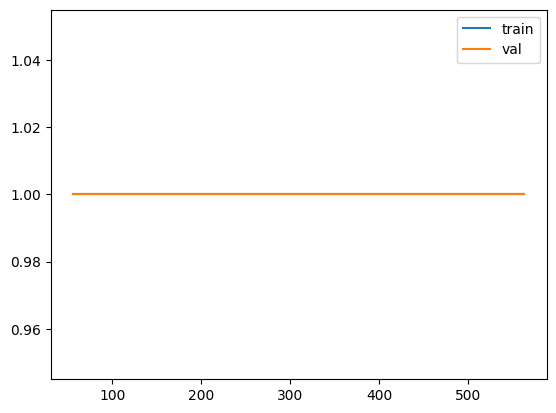

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
train_sizes, train_scores, val_scores = learning_curve(best_model, X, y, cv=5, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1,1.0,5))
plt.plot(train_sizes, train_scores.mean(axis=1), label='train')
plt.plot(train_sizes, val_scores.mean(axis=1), label='val')
plt.legend(); plt.show()


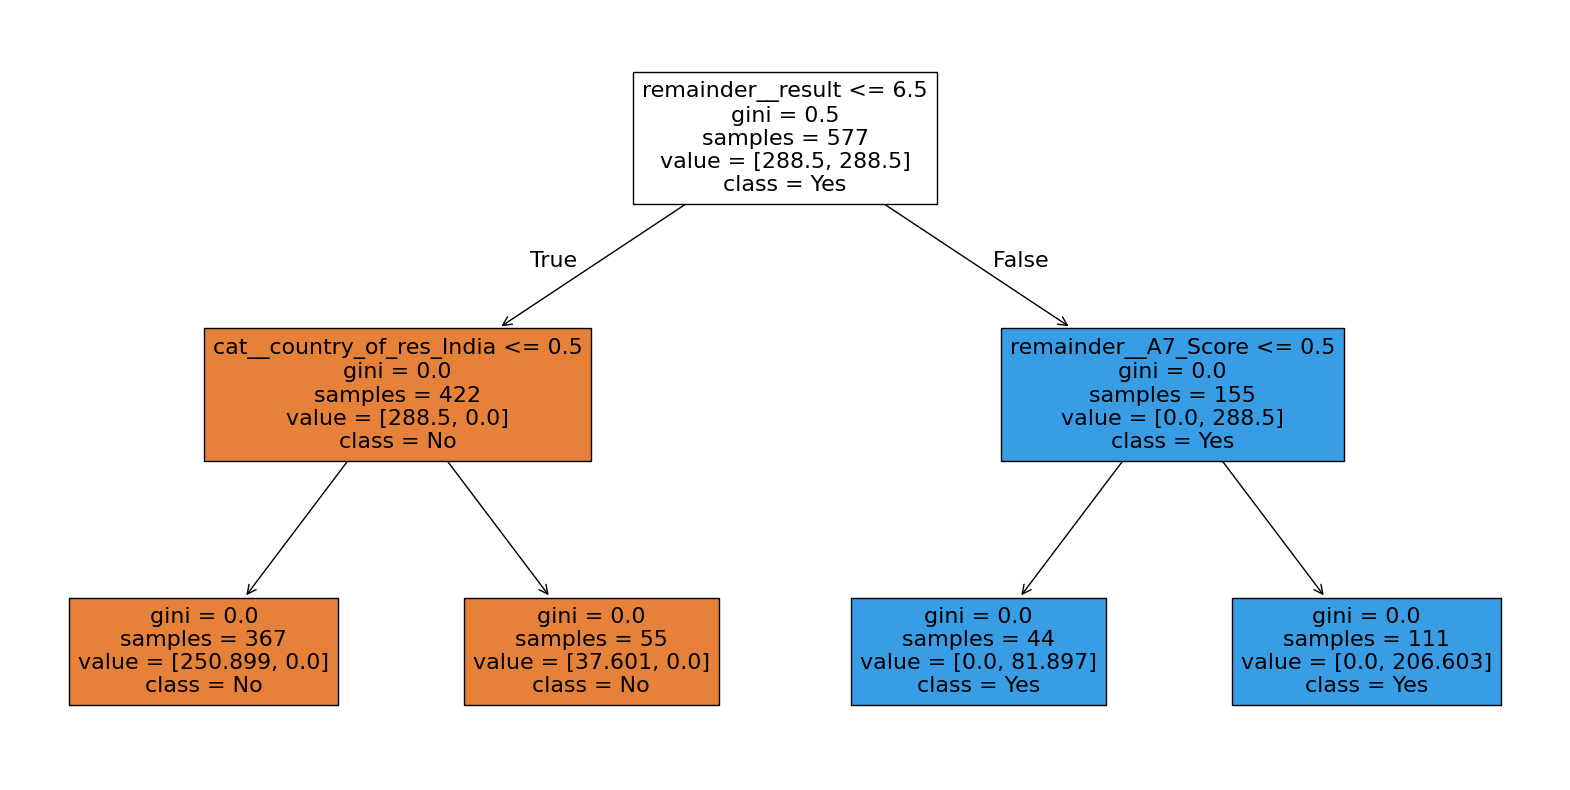

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=feature_names, class_names=['No','Yes'], filled=True)
plt.show()


In [ ]:
for g in df['gender'].unique():
    idx = (X['gender']==g)
    if idx.sum()>10:
        print(g, classification_report(y[idx], best_model.predict(X[idx])))


f               precision    recall  f1-score   support

           0       1.00      1.00      1.00       234
           1       1.00      1.00      1.00       103

    accuracy                           1.00       337
   macro avg       1.00      1.00      1.00       337
weighted avg       1.00      1.00      1.00       337

m               precision    recall  f1-score   support

           0       1.00      1.00      1.00       281
           1       1.00      1.00      1.00        86

    accuracy                           1.00       367
   macro avg       1.00      1.00      1.00       367
weighted avg       1.00      1.00      1.00       367

